# Project Proposal
### "Using Machine Learning to Identify Cellular Infection of Malaria in Third World Countries"

    Students:
    Joseph Rinberg     317156677
    Daniel Fensterheim 302547880

## Goal
Early detection of malaria is paramount for the successful treatment of malaria - more so when medical treatment is both difficult to come by and lower quality.<br>
This is the situation in Africa at the moment - with the highest rates in Burkina Faso with a 20% mortality rate of malaria in children under the age of 5.

## Malaria in Africa
### Percentage of deaths caused by malaria in children under 5 years of age
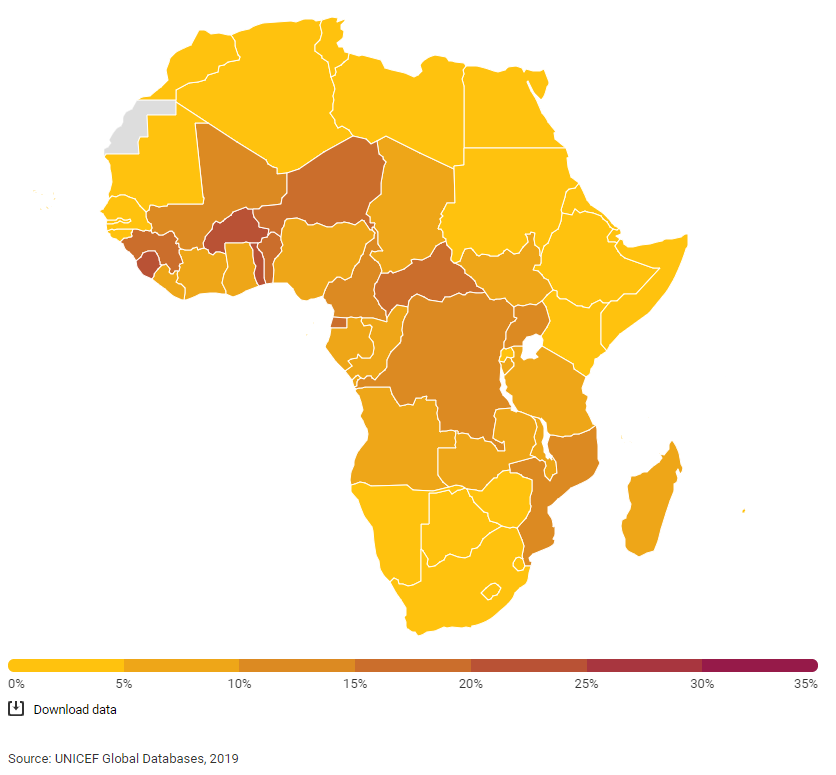

### What would the solution look like?
A good solution to the problem would allow an <b>easy</b>, <b>quick</b> and <b>accurate</b> way of diagnosis. Thus allowing doctors to start treatment early and hopefully combat the high mortality rate.<br>
Our premise is that medical facilites have the ability to take cultures from patients, scan them and upload them to the internet.<br>
The server will isolate each cell and <b>accurately</b> identify cells which have been infected to determine if the patient has malaria.

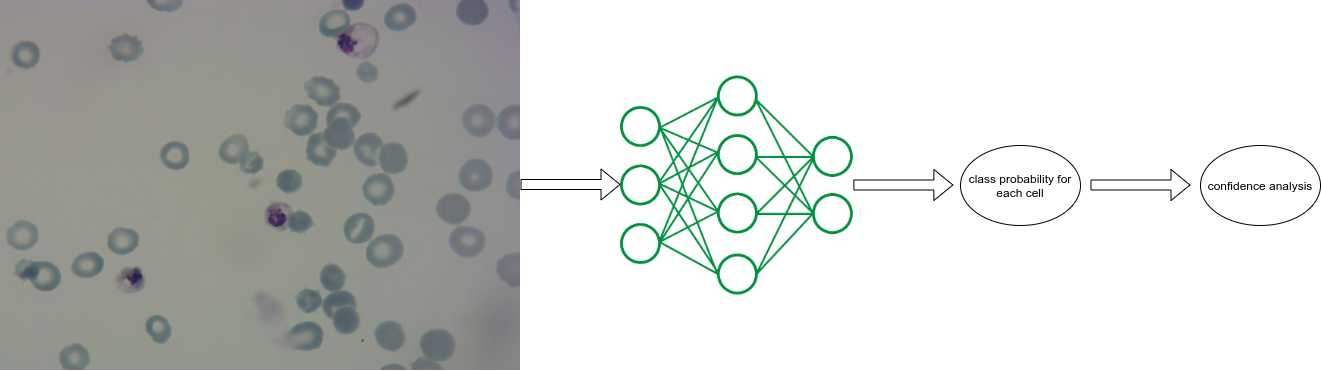

### Why is this needed?
Public health has always been an important factor for the development of a country. Moreso in light of recent events surrounding the COVID19 outbreak. In addition childhood mortality rates have been linked to the development of countries by tracking their GDP<sup>1</sup>.<br>
In general, being able to provide effective and accurate treatment to illnesses is an important goal regardless of the positive knockon effect it may have on the economy. 


<font size=1><sup>1</sup> O'Hare, B., Makuta, I., Chiwaula, L., & Bar-Zeev, N. (2013). <i>Income and child mortality in developing countries: a systematic review and meta-analysis. Journal of the Royal Society of Medicine</i>, 106(10), 408-414.</font>


Looking at the number of children born per woman over the last 40 years or so show the world trending to a stabilization point, approximately two children per parents, i.e a 1:1 ratio - thus keeping the population static at an estimated 11 billion humans.

Looking at the data from OECD countries, we can see that most of them sit at the 2c/w mark, with Israel as an outlier - probably because of a cultral decision to have many children, as opposed to a <i>need</i> to have many children to assure that at least two survive to adulthood (the average in Sub-Saharan Africa)

### Fertility rates, Children/woman, 1970 – 2017
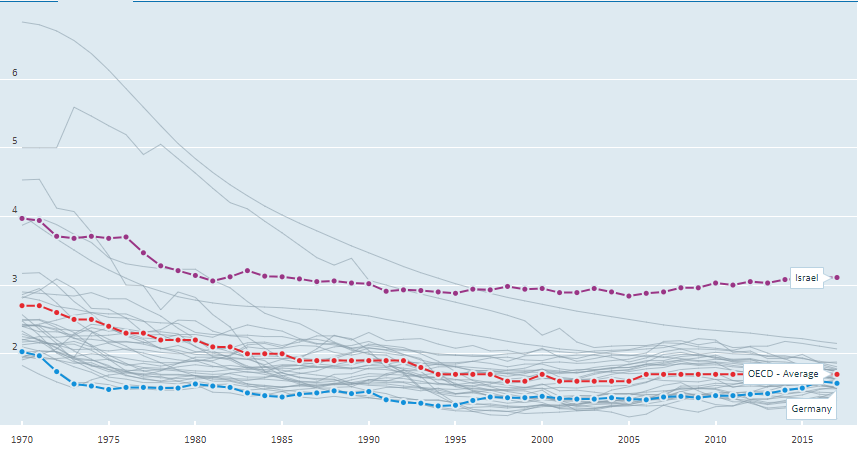
<font size=2>https://data.oecd.org/pop/fertility-rates.htm</font>

In the following graph we can see how fertility have fallen over the last decade, this is in major part because of access to clean water and medical facilities causing a lower childhood mortatlity, therefore requiring fewer children.

### Sub-Saharan Africa: Fertility rate from 2007 to 2017
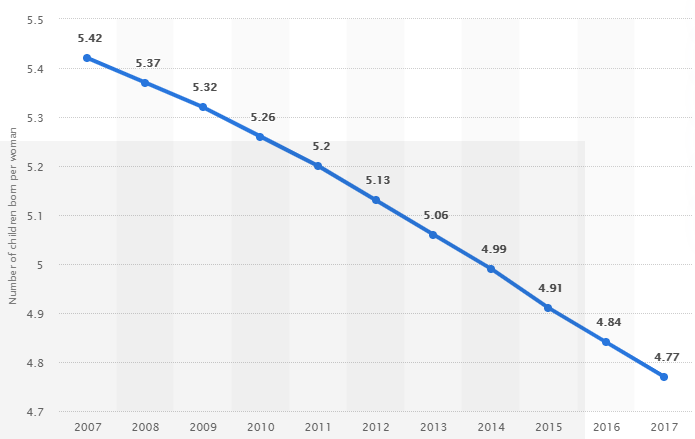
<font size=2>https://www.statista.com/statistics/805638/fertility-rate-in-sub-saharan-africa/</font>

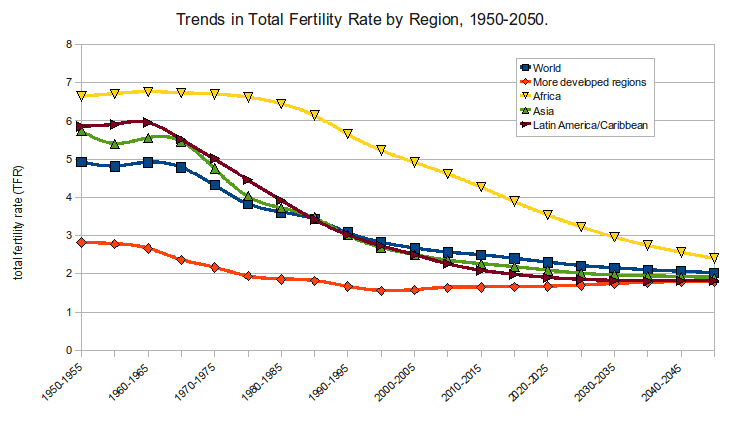
<font size=2>https://www.populationconnection.org/africa-globaldev/</font>

### Motivation summary
We've seen in the data above that malaria is a major issue in Africa.<br>
In addition there is a link between decreased childhood mortality and an increase in general quality of life.<br>


## The Datasets
We will be dealing with two types of datasets:<br>
 - singe cells
 - cell cultures
 
Single cells dataset consists of labeled cells (n=27500), half of which are infected and the other half healthy.<br>
The data can be viewed here: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/

#### Example infected cell:
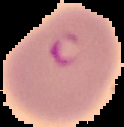
#### Example healthy cell:
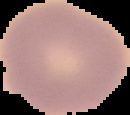
<br>
Cell culture dataset consists of images of cell cultures and their corresponding metadata containing bounding box and cell type for each cell in the culture. The data is highly skewed with a small number of infected cells and a large number of uninfected red blood cells.
<br>
The data canbe viewed here: https://data.broadinstitute.org/bbbc/BBBC041/

#### Example culture:
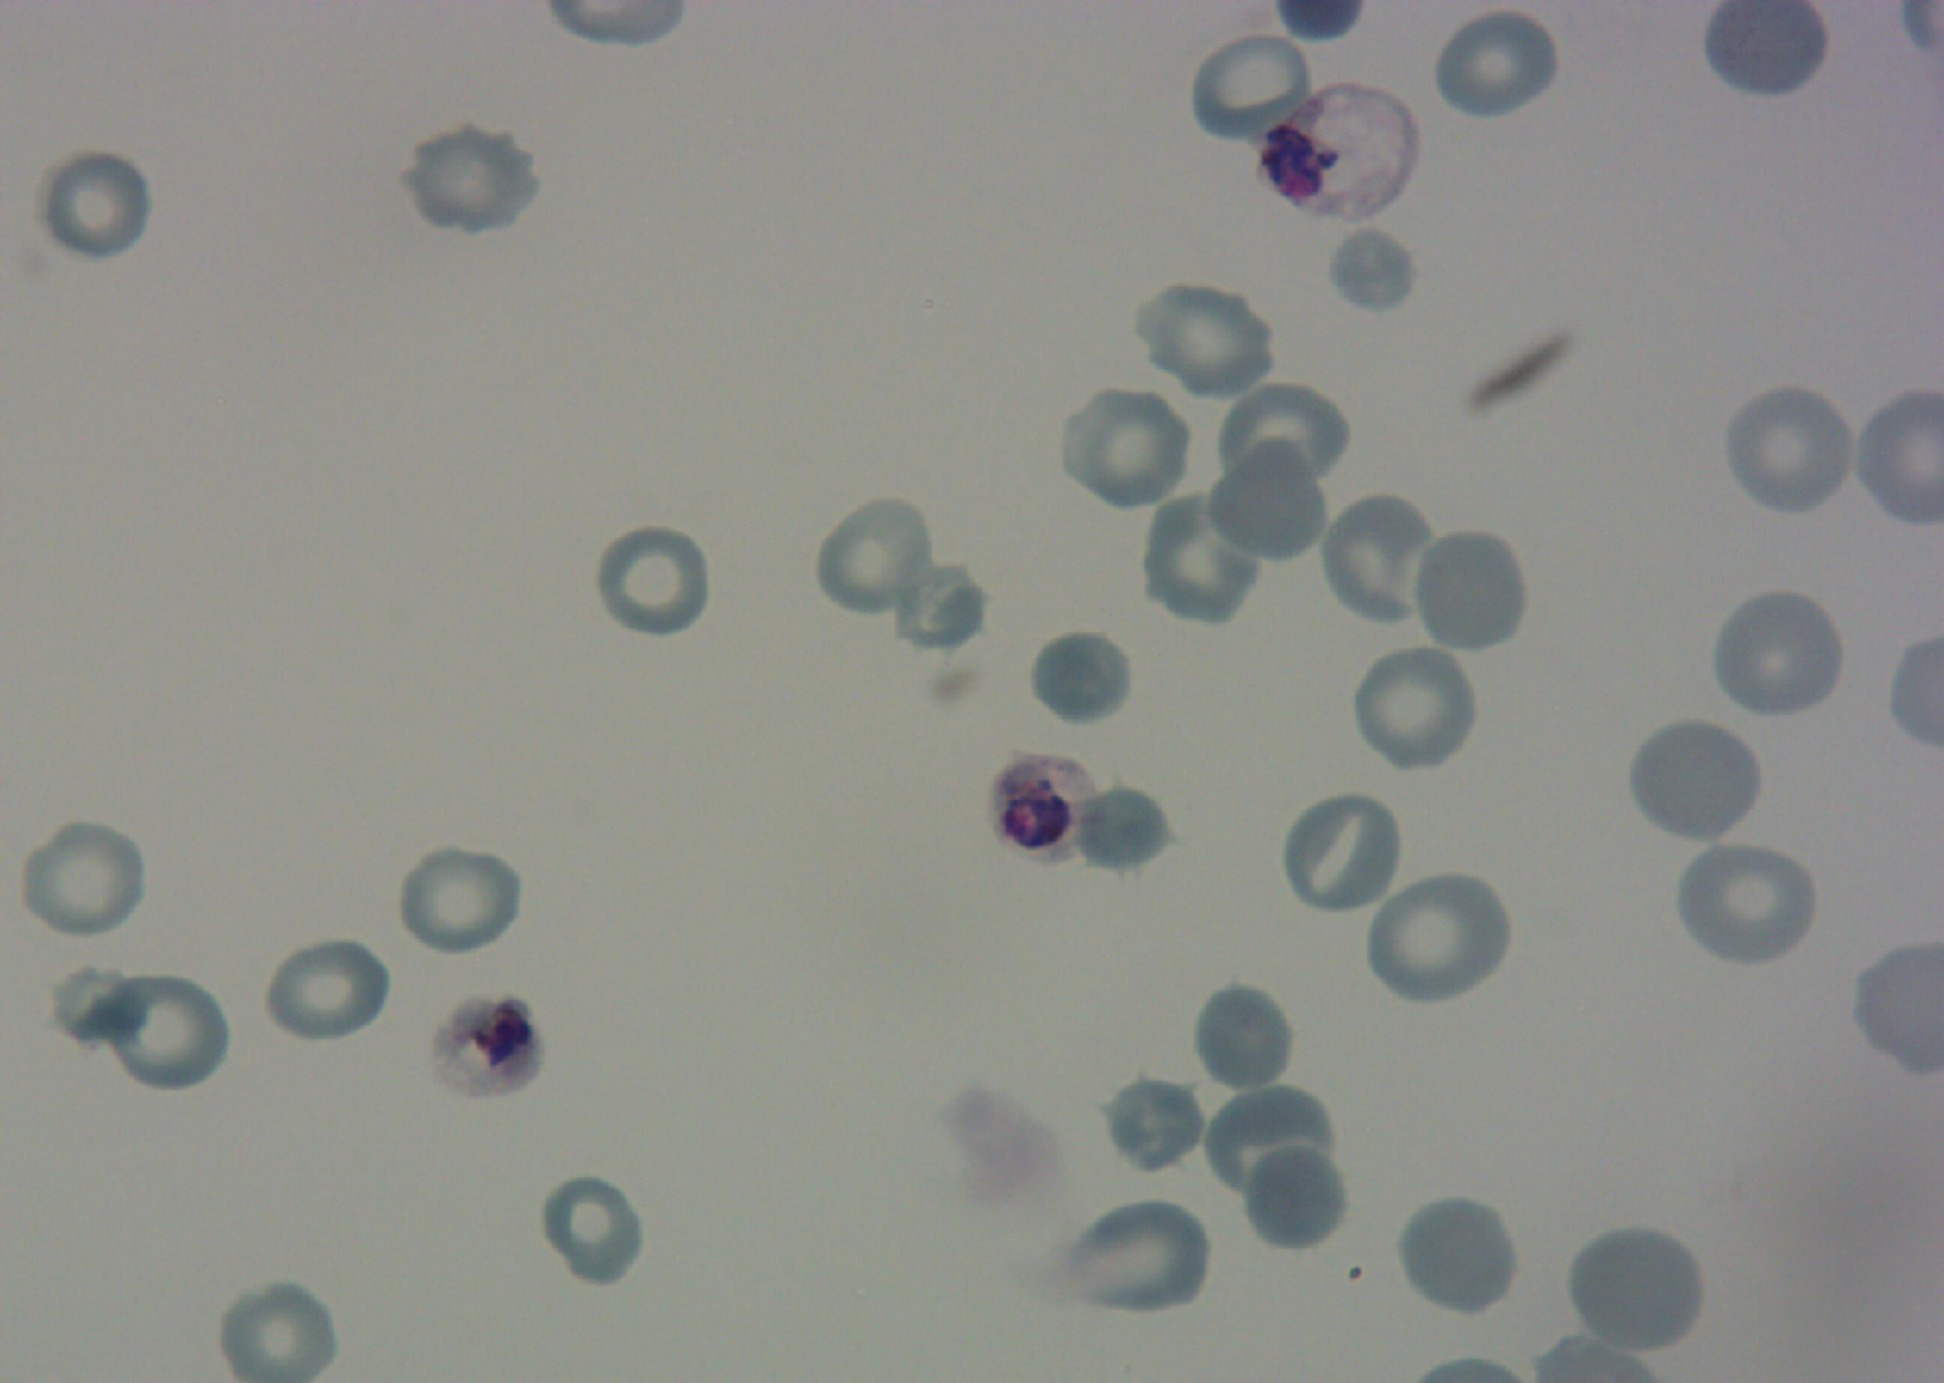

<br>

#### Example image metadata:

[{'bounding_box': {'minimum': {'r': 840, 'c': 392}, 'maximum': {'r': 960, 'c': 526}}, 'category': 'red blood cell'}, ... , {'bounding_box': {'minimum': {'r': 752, 'c': 983}, 'maximum': {'r': 867, 'c': 1102}}, 'category': 'trophozoite'}]

### Techniques and Algorithms

Both databases (cell + culture) will be used to explore different methods and options of providing end to end solution (culture to diagnosis).<br>
We will use deep learning methods with some of {OpenCV, pytorch, tensorflow, sklearn, fastai, keras} for cell object detection.<br>
We will start off by using local CPU for processing.
If needed and in budget, we will extend to use AWS GPU instances for the training process.

Presenting the final data.
Since just giving a percentage of the infected cells can cause "blind trust" we want to present how confident the model is with its results.
It aggregates the results of each cell into one of ten bins according to some confidence calculator and then presents that along with the result. Meaning if it says that 98% of its classifications are very probable (>0.95 lets say) then the user can be confident to trust the results (0% infected cells). But if for example the confidence level is all over the place, then the model isn't sure about its classifications and the user shouldn't use the results.

 -- Linear --
Skewed Data (Can trust the result):


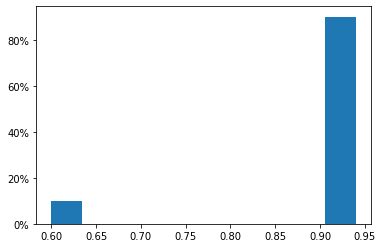

Random Data (Can't trust the result):


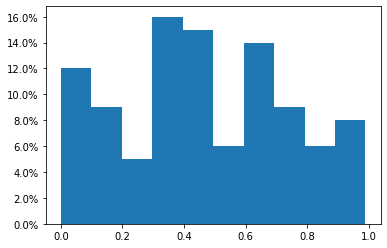

 -- Parabolic --
Skewed Data (Can trust the result):


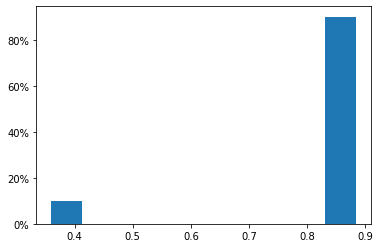

Random Data (Can't trust the result):


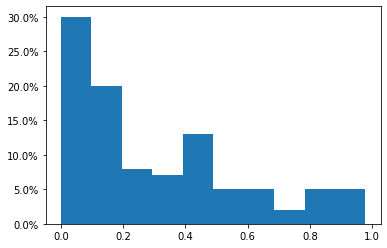

 -- Alt Sigmoid --
Skewed Data (Can trust the result):


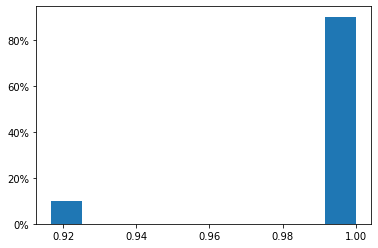

Random Data (Can't trust the result):


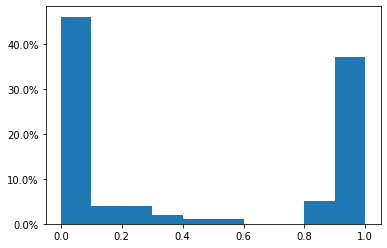

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Simple linear confidence calculator
def calc_conf_linear(val):
    # Normalize to refrence 0.5 as base
    if val < 0.5:
        val = 1-val
    return (val-0.5)/0.5

# Parabolic confidence calc - under values the score, moreso closer to 0.5
def calc_conf_parabolic(val):
    # Normalize to refrence 0.5 as base
    if val < 0.5:
        val = 1-val
    return ((val-0.5)**2)/0.25

# Alternate sigmoid function, quicker to lower confidence closer to 0.5, quicker to raise confidence closer to 1.0
# Note: Seems a bit extreme...
def calc_conf_alt_sigmoid(val):
    # Normalize to refrence 0.5 as base
    if val < 0.5:
        val = 1-val
    return 1 / (1+math.e**(36-48*val))

def create_hist(data, conf_func):
    conf_data = [conf_func(x) for x in data]
    plt.hist(conf_data, bins=10, weights=np.ones(len(data)) / len(data))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

# Generated from random data
rand_data = [0.6954232618985189, 0.70066361062224, 0.4081201166188878, 0.29992602133820345, 0.20068962393551126, 0.5343757748232177, 0.5092610207712247, 0.7217883080340669, 0.6749828552375728, 0.3341062433430684, 0.7797164336843585, 0.7225410848273807, 0.5463686141144942, 0.8471643268719377, 0.10698089426242252, 0.9189613405296483, 0.3352699525632056, 0.5960002934544588, 0.34466865162580207, 0.5877584260917402, 0.4192099748364463, 0.5639591168670745, 0.1348461431006598, 0.733691880426954, 0.2858443887645523, 0.157387371110016, 0.9945441905099452, 0.6990851455148406, 0.4776927202030725, 0.7939909805138949, 0.1730707867299992, 0.20704189881860469, 0.14548528024639118, 0.5103330151212925, 0.2467425833352408, 0.7060018276139929, 0.9084166830975288, 0.48524675857497335, 0.15603538809156237, 0.4702037143107962, 0.054926222669787195, 0.7322435011358187, 0.3414962099130704, 0.8209119800717544, 0.43457253305128773, 0.7887417465819128, 0.8438595474200399, 0.3011013818345152, 0.60461375711685, 0.2542569412125, 0.9514341644037619, 0.14291353905841586, 0.3514638745912282, 0.3272053492629382, 0.6290026991860365, 0.16531469629470952, 0.7399732030102166, 0.9432952821236981, 0.1356408986601092, 0.8294985589629996, 0.11071130144158259, 0.8285228038479276, 0.4520066259691071, 0.017409830985841146, 0.5321145304260478, 0.6843102696190445, 0.01770521308145978, 0.9083740648882258, 0.40931198620384546, 0.723027355228587, 0.44010198465407047, 0.5830078318189421, 0.6500436159861661, 0.8165286280614914, 0.6590946506557954, 0.6944143278645795, 0.8307552952549782, 0.0851778035948928, 0.9609539976451211, 0.672361940591127, 0.10748208595133613, 0.986387450614365, 0.6527670569933389, 0.19044530208137822, 0.6491712730275059, 0.7131132309893375, 0.8787150998589434, 0.9645765753835083, 0.16352104485697572, 0.025691637336353934, 0.6643374960354247, 0.30748936198354415, 0.5426925213991686, 0.3800457868814623, 0.1756233453772883, 0.5021674195270893, 0.7900910967132252, 0.7198747647877204, 0.6255311947998885, 0.5004508044832647]
skewed_data = [0.97]*10 + [0.03]*80 + [0.2]*5 + [0.8]*5
print(" -- Linear --")
print("Skewed Data (Can trust the result):")
create_hist(skewed_data, calc_conf_linear)
print("Random Data (Can't trust the result):")
create_hist(rand_data, calc_conf_linear)

print(" -- Parabolic --")
print("Skewed Data (Can trust the result):")
create_hist(skewed_data, calc_conf_parabolic)
print("Random Data (Can't trust the result):")
create_hist(rand_data, calc_conf_parabolic)

print(" -- Alt Sigmoid --")
print("Skewed Data (Can trust the result):")
create_hist(skewed_data, calc_conf_alt_sigmoid)
print("Random Data (Can't trust the result):")
create_hist(rand_data, calc_conf_alt_sigmoid)


The parabola from the previous section:
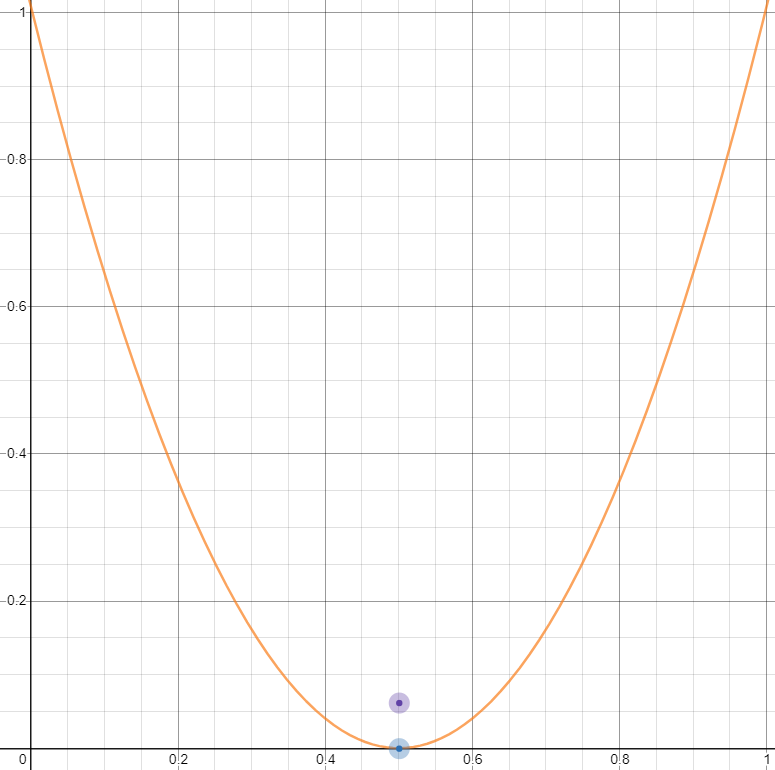

### Initial results

#### EDA

lets first begin with understanding the data

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from  matplotlib import patches
import sys
import os
import json
from flatten_json import flatten_json

sys.path.append(os.path.dirname(os.path.abspath('')))

In [2]:
test_data_json_file = open('../malaria_culture_data/training.json', 'r')
test_data_json = json.load(test_data_json_file)
test_data_json_file.close()


In [3]:
flattened_test_data = []
for i, image in enumerate(test_data_json[:]):
    objects = []
    for obj in image['objects']:
        objects.append(flatten_json(obj))
    test_data_json[i]['objects'] = objects

In [4]:
training_data = json_normalize(test_data_json,
                                  record_path=['objects'],
                                  meta=[['image', 'pathname']], sep='_')
training_data.head()

,bounding_box_maximum_c,bounding_box_maximum_r,bounding_box_minimum_c,bounding_box_minimum_r,category,image_pathname
0,1540,1158,1440,1057,red blood cell,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png
1,1403,971,1303,868,red blood cell,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png
2,1008,689,900,578,red blood cell,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png
3,713,408,611,304,red blood cell,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png
4,1003,312,881,198,red blood cell,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png


In [6]:
training_data['image_pathname'].nunique()

1208

In [7]:
training_data['category'].value_counts()

red blood cell    77420
trophozoite        1473
difficult           441
ring                353
schizont            179
gametocyte          144
leukocyte           103
Name: category, dtype: int64

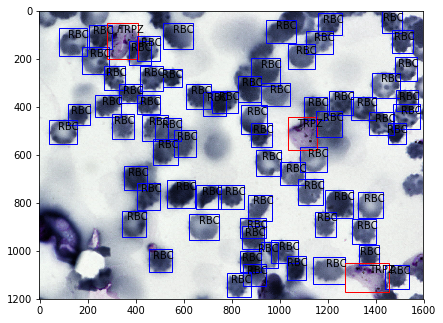

In [15]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])
image_name = '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'
image = plt.imread('../malaria_culture_data' + image_name)
plt.imshow(image)

for _, row in training_data[training_data.image_pathname == image_name].iterrows():
    xmax = row.bounding_box_maximum_c
    xmin = row.bounding_box_minimum_c
    ymax = row.bounding_box_maximum_r
    ymin = row.bounding_box_minimum_r
    
    width = xmax - xmin
    height = ymax - ymin
    
    if row.category == 'red blood cell':
        edgecolor = 'b'
        tag_name = 'RBC'
    elif row.category == 'trophozoite':
        edgecolor = 'r'
        tag_name = 'TRPZ'
    elif row.category == 'difficult':
        edgecolor = 'g'
        tag_name = 'DFCLT'
    elif row.category == 'ring':
        edgecolor = 'r'
        tag_name = 'RNG'
    elif row.category == 'schizont':
        edgecolor = 'r'
        tag_name = 'SCHZ'
    elif row.category == 'gametocyte':
        edgecolor = 'r'
        tag_name = 'GMTCT'
    elif row.category == 'leukocyte':
        edgecolor = 'b'
        tag_name = 'LKCT'
    else:
        edgecolor = 'g'
        tag_name = 'NAN'
    ax.annotate(tag_name, xy=(xmax - 80,ymin + 40))
    rect = patches.Rectangle((xmin, ymin), width, height, 
                             edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)


<div align="center">-- Under this line will be removed once the document is complete. --</div>

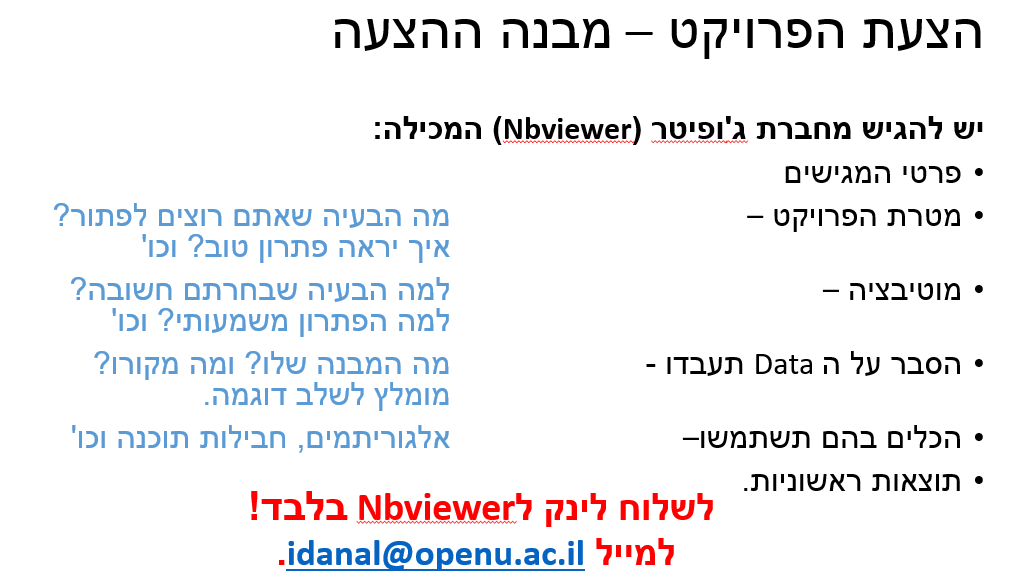